<h3> LAB 4 - Transformada Z</h3>
<h5> Processamento Digital de Sinais II - TE912 </h5>
<h5> Leonardo Barbosa da Silva GRR20162855 </h5> 

In [8]:
# Inicializa os pacotes que serão utilizados
from pylab import *
from scipy import signal

Considere as seguintes EDCC que representam sistemas com os seguintes coeficientes:
<ol>
    <li> b = 0.0053 0.0159 0.0159 0.0053 a = 1.0000</li>
    <li> b = 0.0210 0.0632 0.0632 0.0210 a = 1.0000 -1.8663 1.4986 -0.4636</li>
    <li> b = 0.1589 0.4029 0.4029 0.1589 a = 1.0000 -0.3082 0.6290 -0.1970 </li>
</ol>

In [9]:
a1 = [1.0000]
b1 = [0.0053, 0.0159, 0.0159, 0.0053]

a2 = [1.0000, -1.8663, 1.4986, -0.4636]
b2 = [0.0210, 0.0632, 0.0632, 0.0210]

a3 = [1.0000, -0.3082, 0.6290, -0.1970]
b3 = [0.1589, 0.4029, 0.4029, 0.1589]

<b>a) plote no mesmo gráfico, a resposta em frequência de cada um desses sistemas.</b>

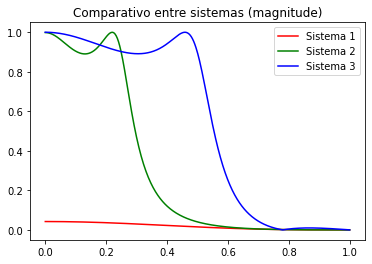

In [10]:
w1,H1 = signal.freqz(b1,a1)
w2,H2 = signal.freqz(b2,a2)
w3,H3 = signal.freqz(b3,a3)

w1 = w1/pi
w2 = w2/pi
w3 = w3/pi

plt.plot(w1,abs(H1),'r',w2,abs(H2),'g',w3,abs(H3),'b')
plt.legend(['Sistema 1','Sistema 2','Sistema 3'])
plt.title("Comparativo entre sistemas (magnitude)")
plt.show()



<b>b) plote no mesmo gráfico, os polos e zeros de cada um desses sistemas.</b>

In [11]:
from collections import defaultdict

def zplane(b,a,status='start',color='r'):
    a = asarray(a)
    b = asarray(b)
    global firstRun
    
    if status is 'start':
        create_unit_circle()
        
    z,p = get_pz(b,a)
    
    # Plot the zeros and set marker properties    
    t1 = plot(z.real, z.imag, 'go', ms=10)
    setp( t1, markersize=8.0, markeredgewidth=1.0,
              markeredgecolor=color, markerfacecolor='none')

    # Plot the poles and set marker properties
    t2 = plot(p.real, p.imag, 'rx', ms=10)
    setp( t2, markersize=8.0, markeredgewidth=1.0,
              markeredgecolor=color, markerfacecolor='r')
    
    mark_overlapping(z)
    mark_overlapping(p)

    if status is 'end':
        show()     
    
    return z.tolist() , p.tolist()

def mark_overlapping(items):
    d = defaultdict(int)
    for i in items:
        d[i] += 1
    for item, count in d.items():
        if count > 1:
            plt.text(item.real, item.imag, r' ${}^{' + str(count) + '}$', fontsize=13)
            
def create_unit_circle():
    # get a figure/plot
    figure(figsize=(8,7))
    ax = subplot(111)

    # create the unit circle
    uc = Circle((0,0), radius=1, fill=False,
                        color='gray', ls='dashed')
    ax.add_patch(uc)

    ax.spines['left'].set_position('center')
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_position('center')
    ax.spines['bottom'].set_color('gray')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
        
    # set the ticks
    r = 1.5; axis('scaled'); axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; xticks(ticks); yticks(ticks)
    ax.tick_params(colors='gray')
    ax.title.set_text('Zplane')
    
    return

def get_pz(b,a):
    # The coefficients are less than 1, normalize the coeficients
    if max(b) > 1:
        kn = max(b)
        b = b/float(kn)
    else:
        kn = 1

    if max(a) > 1:
        kd = max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = roots(a)
    z = roots(b)
    k = kn/float(kd)
    
    z = around(z,3)
    p = around(p,3)
    
    return z,p

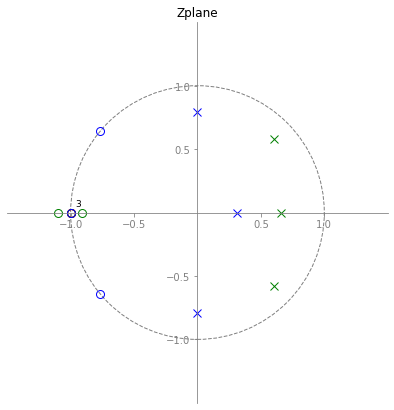

Sistema 1 (Vermelho):
Zeros: [(-1+0j), (-1-0j), (-1+0j)]
Polos: []

Sistema 2 (Verde):
Zeros: [-1.102, -1.0, -0.907]
Polos: [(0.603+0.582j), (0.603-0.582j), (0.66+0j)]

Sistema 3 (Azul):
Zeros: [(-1+0j), (-0.768+0.641j), (-0.768-0.641j)]
Polos: [(-0.002+0.794j), (-0.002-0.794j), (0.313+0j)]



In [12]:
z1,p1 = zplane(b1,a1,'start','r')
z2,p2 = zplane(b2,a2,'','g')
z3,p3 = zplane(b3,a3,'end','b')

print('Sistema 1 (Vermelho):')
print('Zeros: ' + str(z1))
print('Polos: ' + str(p1))
print()

print('Sistema 2 (Verde):')
print('Zeros: ' + str(z2))
print('Polos: ' + str(p2))
print()

print('Sistema 3 (Azul):')
print('Zeros: ' + str(z3))
print('Polos: ' + str(p3))
print()

<b>c) Informe que tipo de filtragem cada um deles realiza</b>

O sistema 1 não possui polos, assim indica que é um filtro FIR. Como os três zeros estão no círculo unitário e seu ganho é baixíssimo em todo o espectro conforme visto em a), pode-se supor que ele é um rejeita-faixa. <br>

O sistema 2 é um filtro IIR, pois possui polos diferentes de 0. Pela posição dos zeros próximos a -1 temos um atenuação na frequência $f_{s}$/2. Esta atenuação porém é menos seletiva devido a presença dos outros zeros fora do círculo unitário. Os polos em 1 e em aproximadamente $\omega$ = $f_{s}$/8 apresentam ganhos que correspondem a uma banda de passagem nas baixas frequências, e assim o filtro é um passa baixa.<br>

O sistema 3 é um filtro IIR, pois possui polos diferentes de 0. Os zeros na porção esquerda apontam para atenuações em altas frequências, com duas frequências nas quais ela será máxima. Isso porque existem zeros em -1 e em aproximadamente em $\omega$ = 6$f_{s}$/8. Já os polos estão no DC em  $f_{s}$/4, com ganho menos seletivo na primeira frequência e mais acentuado na segunda. Com a concentração dos ganhos somente em frequências baixas, pode-se concluir que o filtro é um passa-baixa também, porém com uma banda mais larga que o sistema 2.

<b>d) Calcule a frequência de corte de cada um deles.</b>

Freq corte 1: 0.30078125
Freq corte 2: 0.271484375
Freq corte 3: 0.525390625


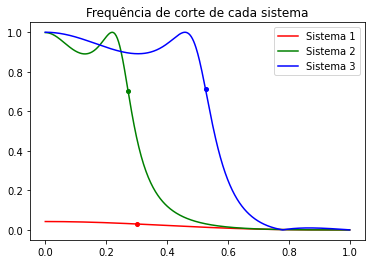

In [13]:
# Função que busca o valor mais próximo de uma referência em um vetor
def compare(array, value):
    idx = (np.abs(array - value)).argmin()  
    return idx

# Define um valor de referência em cada um dos sistemas.
# Este valor é o ponto em que a resposta em frequência
# é 0.707 vezes o máximo. 

# Ou seja, aproximadamente o ponto de -3db, no qual se 
# encontra a frequência de corte de um sistema
value1 = max(abs(H1))*0.707
value2 = max(abs(H2))*0.707
value3 = max(abs(H3))*0.707

# Calcula a frequência de corte do sistema 1
idx_1 = compare(abs(H1),value1)
w_cut1 = w1[idx_1]
print('Freq corte 1: ' + str(w_cut1))

# Calcula a frequência de corte do sistema 2
idx_2 = compare(abs(H2),value2)
w_cut2 = w2[idx_2]
print('Freq corte 2: ' + str(w_cut2))

# Calcula a frequência de corte do sistema 3
idx_3 = compare(abs(H3),value3)
w_cut3 = w3[idx_3]
print('Freq corte 3: ' + str(w_cut3))

# Cria o plot das respostas em frequência dos sistemas
plt.plot(w1,abs(H1),'r',w2,abs(H2),'g',w3,abs(H3),'b')
plt.legend(['Sistema 1','Sistema 2','Sistema 3'])
plt.title("Frequência de corte de cada sistema")

# Cria os marcadores correspondentes as freqs de corte
plot(w_cut1, abs(H1[idx_1]), 'r.', markersize=8)
plot(w_cut2, abs(H2[idx_2]), 'g.', markersize=8)
plot(w_cut3, abs(H3[idx_3]), 'b.', markersize=8)

plt.show()